## Project Description
This project aims to provide an understanding of Opportunity Youth (OY) are in South King County, Washington, including which areas have the highest amount of OY, what possible factors affect the amount of OY in a given area, whether OY is increasing or decreasing and where these trends are occurring. We pull data from [Public Use Microdata Sample (PUMS)](https://www.census.gov/programs-surveys/acs/technical-documentation/pums/about.html) 5 year data files for 2014 and 2018. Our goal is to show where public assistance programs will be most effective, both in regards to OY demographics and the geographical regions in which those OY reside.


#### METHODOLOGY:
After reviewing the materials provided by the SRP, there were a number of questions that we needed to address:
The Road Map Project report does not specifically define South King County.  In order to understand the data and make it applicable, we needed to define what the South King County geographic area would include.  We first looked at the Public Use Microdata Area (PUMA) names as listed in the pums_2018 data table.  By including only those PUMAs with both ‘King County’ and ‘South’ in the name, we identified a number of PUMAs that could reasonably be included in the definition of ‘South King County’ - we found that this initial definition was too specific and resulting in a subset of the data that was likely excluding a large portion of the population we were interested in exploring.  We then consulted the King County website to see if there was an official county designation of ‘South King County’.  Including these additional PUMAs expanded our subset to the area included with PUMAs 11610, 11611, 11612,  11613, 11614, and 11615
(see Maximilian’s South King County map image file)

The Road Map Project report defined Opportunity Youth (OY) as 16- to 24-year-olds who are not currently enrolled in school and are not currently working.  Using the PUMS_2017 table, we used the variables ‘sch’ and ‘esr’ to define the same population.  Our estimated total for the OY population in 2017 is 10,614.  We used the same definitions to determine the estimate for 2018.

Our next step was to break out the different traits of this OY population to see if there was anything that varied significantly from the rest of the youth population in South King County.  


## General Set-up

We downloaded our data and put them into our own local postgres database.

In [1]:
%load_ext autoreload
%autoreload 2

#modules for setting the path
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

We used the following python packages to explore our data:

In [2]:
#modules for opening the data
import psycopg2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import src

We set up our connection to the local server and imported our data sets from 2014 and 2018.

In [3]:
#Retrieving postgres info
from src.data import local
PORT = local.port
USER = local.user
HOST = local.host
PASSWORD = local.password

DBNAME = "opportunity_youth"
conn = psycopg2.connect(dbname=DBNAME, user=USER, password=PASSWORD, port=PORT, host=HOST)



#### Exploring the Data

Our data set is built on a sql query that converts the entries using case statements built on the [2014](https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMSDataDict14.pdf) and [2018](https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2014-2018.pdf?#) PUMS Data Dictionaries (the script for this can be found in the src folder). It's made into a pandas data frame, so looking at the data is pretty easy.

In [4]:
SKC_youth_2014 = src.get_SKC_youth_2014(conn)
SKC_youth_2018 = src.get_SKC_youth_2018(conn)

SKC_youth_2018.head()

,puma,rtrim,agep,gender,race_or_ethnicity,school,education_attainment,employment_status,disability_status,disability_type,...,english_language,last_employed,parent_employment,marital_status,child_born_las_year,presence_of_children,moved,has_health_insurance,public_assistance_income_past_year,weight
0,11614,King County (Southwest)--Auburn City & Lakeland,24.0,male,hispanic,Has not attended in last 3 months,No HS or GED,employed,no reported disability,None reported,...,English Speaker,employed in the last year,None,never married,None,no own children,lived here last year,yes,0.0,17.0
1,11612,"King County (Far Southwest)--Federal Way, Des ...",24.0,male,white,Has not attended in last 3 months,post HS education,employed,no reported disability,None reported,...,English Speaker,employed in the last year,None,never married,None,no own children,lived here last year,no,0.0,39.0
2,11615,"King County (Southeast)--Maple Valley, Covingt...",24.0,male,white,Has not attended in last 3 months,post HS education,employed,no reported disability,None reported,...,English Speaker,employed in the last year,None,never married,None,no own children,lived here last year,yes,0.0,88.0
3,11610,"King County (Central)--Renton City, Fairwood, ...",24.0,male,asian,Has not attended in last 3 months,HS diploma or GED,employed,no reported disability,None reported,...,English Speaker,employed in the last year,None,never married,None,no own children,lived here last year,yes,0.0,19.0
4,11610,"King County (Central)--Renton City, Fairwood, ...",24.0,female,white,Has not attended in last 3 months,post HS education,employed,no reported disability,None reported,...,English Speaker,employed in the last year,None,never married,None,no own children,moved here last year,yes,0.0,28.0


In order to get an idea of who Opportunity Youth were, we needed to compare their demographics with the larger population. We chose to compare Opportunity Youth to the general population of youth in South King County so that we can minimize the impact other age groups could have in our comparison. The data we already imported contains all 16 to 24 y/o in South King County, so we only need to filter out those who have a job and those who are in school, and we will get our Opportunity Youth subset.

In [5]:
OY_df_2014 = src.get_oy(SKC_youth_2014)
OY_df_2018 = src.get_oy(SKC_youth_2018)

### Analysis:

We can look at the total population for a group by summing the values in the weight column. The weight column is pulled from the PUMS pwgtp column which essentially gives a number that represents an approximation of how many people share those characteristics. If each column is person, then the weight value tells us how many people are like them.

We used this to find the population change in both groups between 2014 and 2018:

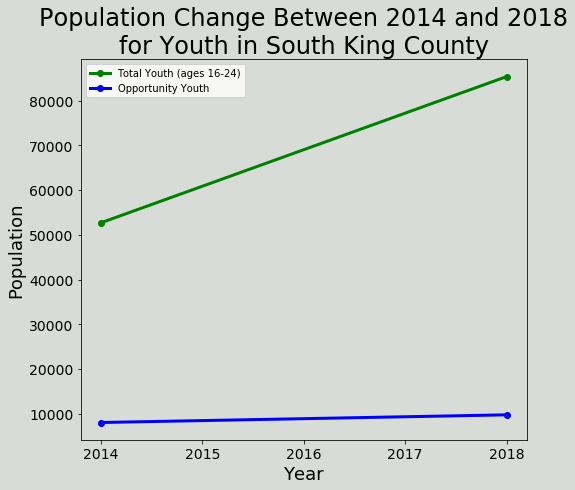

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

ax.set_title('Population Change Between 2014 and 2018\nfor Youth in South King County', fontsize=24)
ax.set_ylabel('Population', fontsize=18)
ax.set_xlabel('Year', fontsize=18)
ax.tick_params(labelsize=14)
# rects1 = ax.bar(x-(width/1.8), female_OY_trend, width, color='green', label='Female')
# rects2 = ax.bar(x+(width/1.8), male_OY_trend, width, label='Male')
# ax.set_xticklabels([2013,2014,2017,2018,2019,2020])
# ax.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

x_var = [2014,2018]
youth_y = [SKC_youth_2014.weight.sum(), SKC_youth_2018.weight.sum()]
ax.plot(x_var, youth_y, marker='o', color='g', linewidth=3, label='Total Youth (ages 16-24)')
OY_y = [OY_df_2014.weight.sum(), OY_df_2018.weight.sum()]
ax.plot(x_var, OY_y, marker='o', color='b', linewidth=3, label='Opportunity Youth')
ax.legend()
ax.set_facecolor('xkcd:light grey')
fig.set_facecolor('xkcd:light grey')

# fig.savefig('Total_pop_change.png')

In addition to this population change we also wanted to see what makes Opportunity Youth different from the general population of youth in South King County.

We got a quick overview of the relationship between these two groups by creating bar graphs for any factors that seemed interesting. The following traits seemed like a good place to start:

In [14]:
variables = ['gender', 'education_attainment', 'disability_status', 'citizenship', 'english_language', 'parent_employment', 'marital_status', 'child_born_las_year', 'presence_of_children', 'moved', 'has_health_insurance']
status = ['female', 'No HS or GED', 'reported disability', 'Not US Citizen', 'Poor or No English language', 'One or both parents in labor force', 'married', 'yes', 'own child(ren)', 'moved here last year', 'no']
variable_and_status_list = list(zip(variables, status))

for va in variable_and_status_list:
    print(va)

('gender', 'female')
('education_attainment', 'No HS or GED')
('disability_status', 'reported disability')
('citizenship', 'Not US Citizen')
('english_language', 'Poor or No English language')
('parent_employment', 'One or both parents in labor force')
('marital_status', 'married')
('child_born_las_year', 'yes')
('presence_of_children', 'own child(ren)')
('moved', 'moved here last year')
('has_health_insurance', 'no')


And from there we can create a series of graphs to get an idea of what these traits might tell us

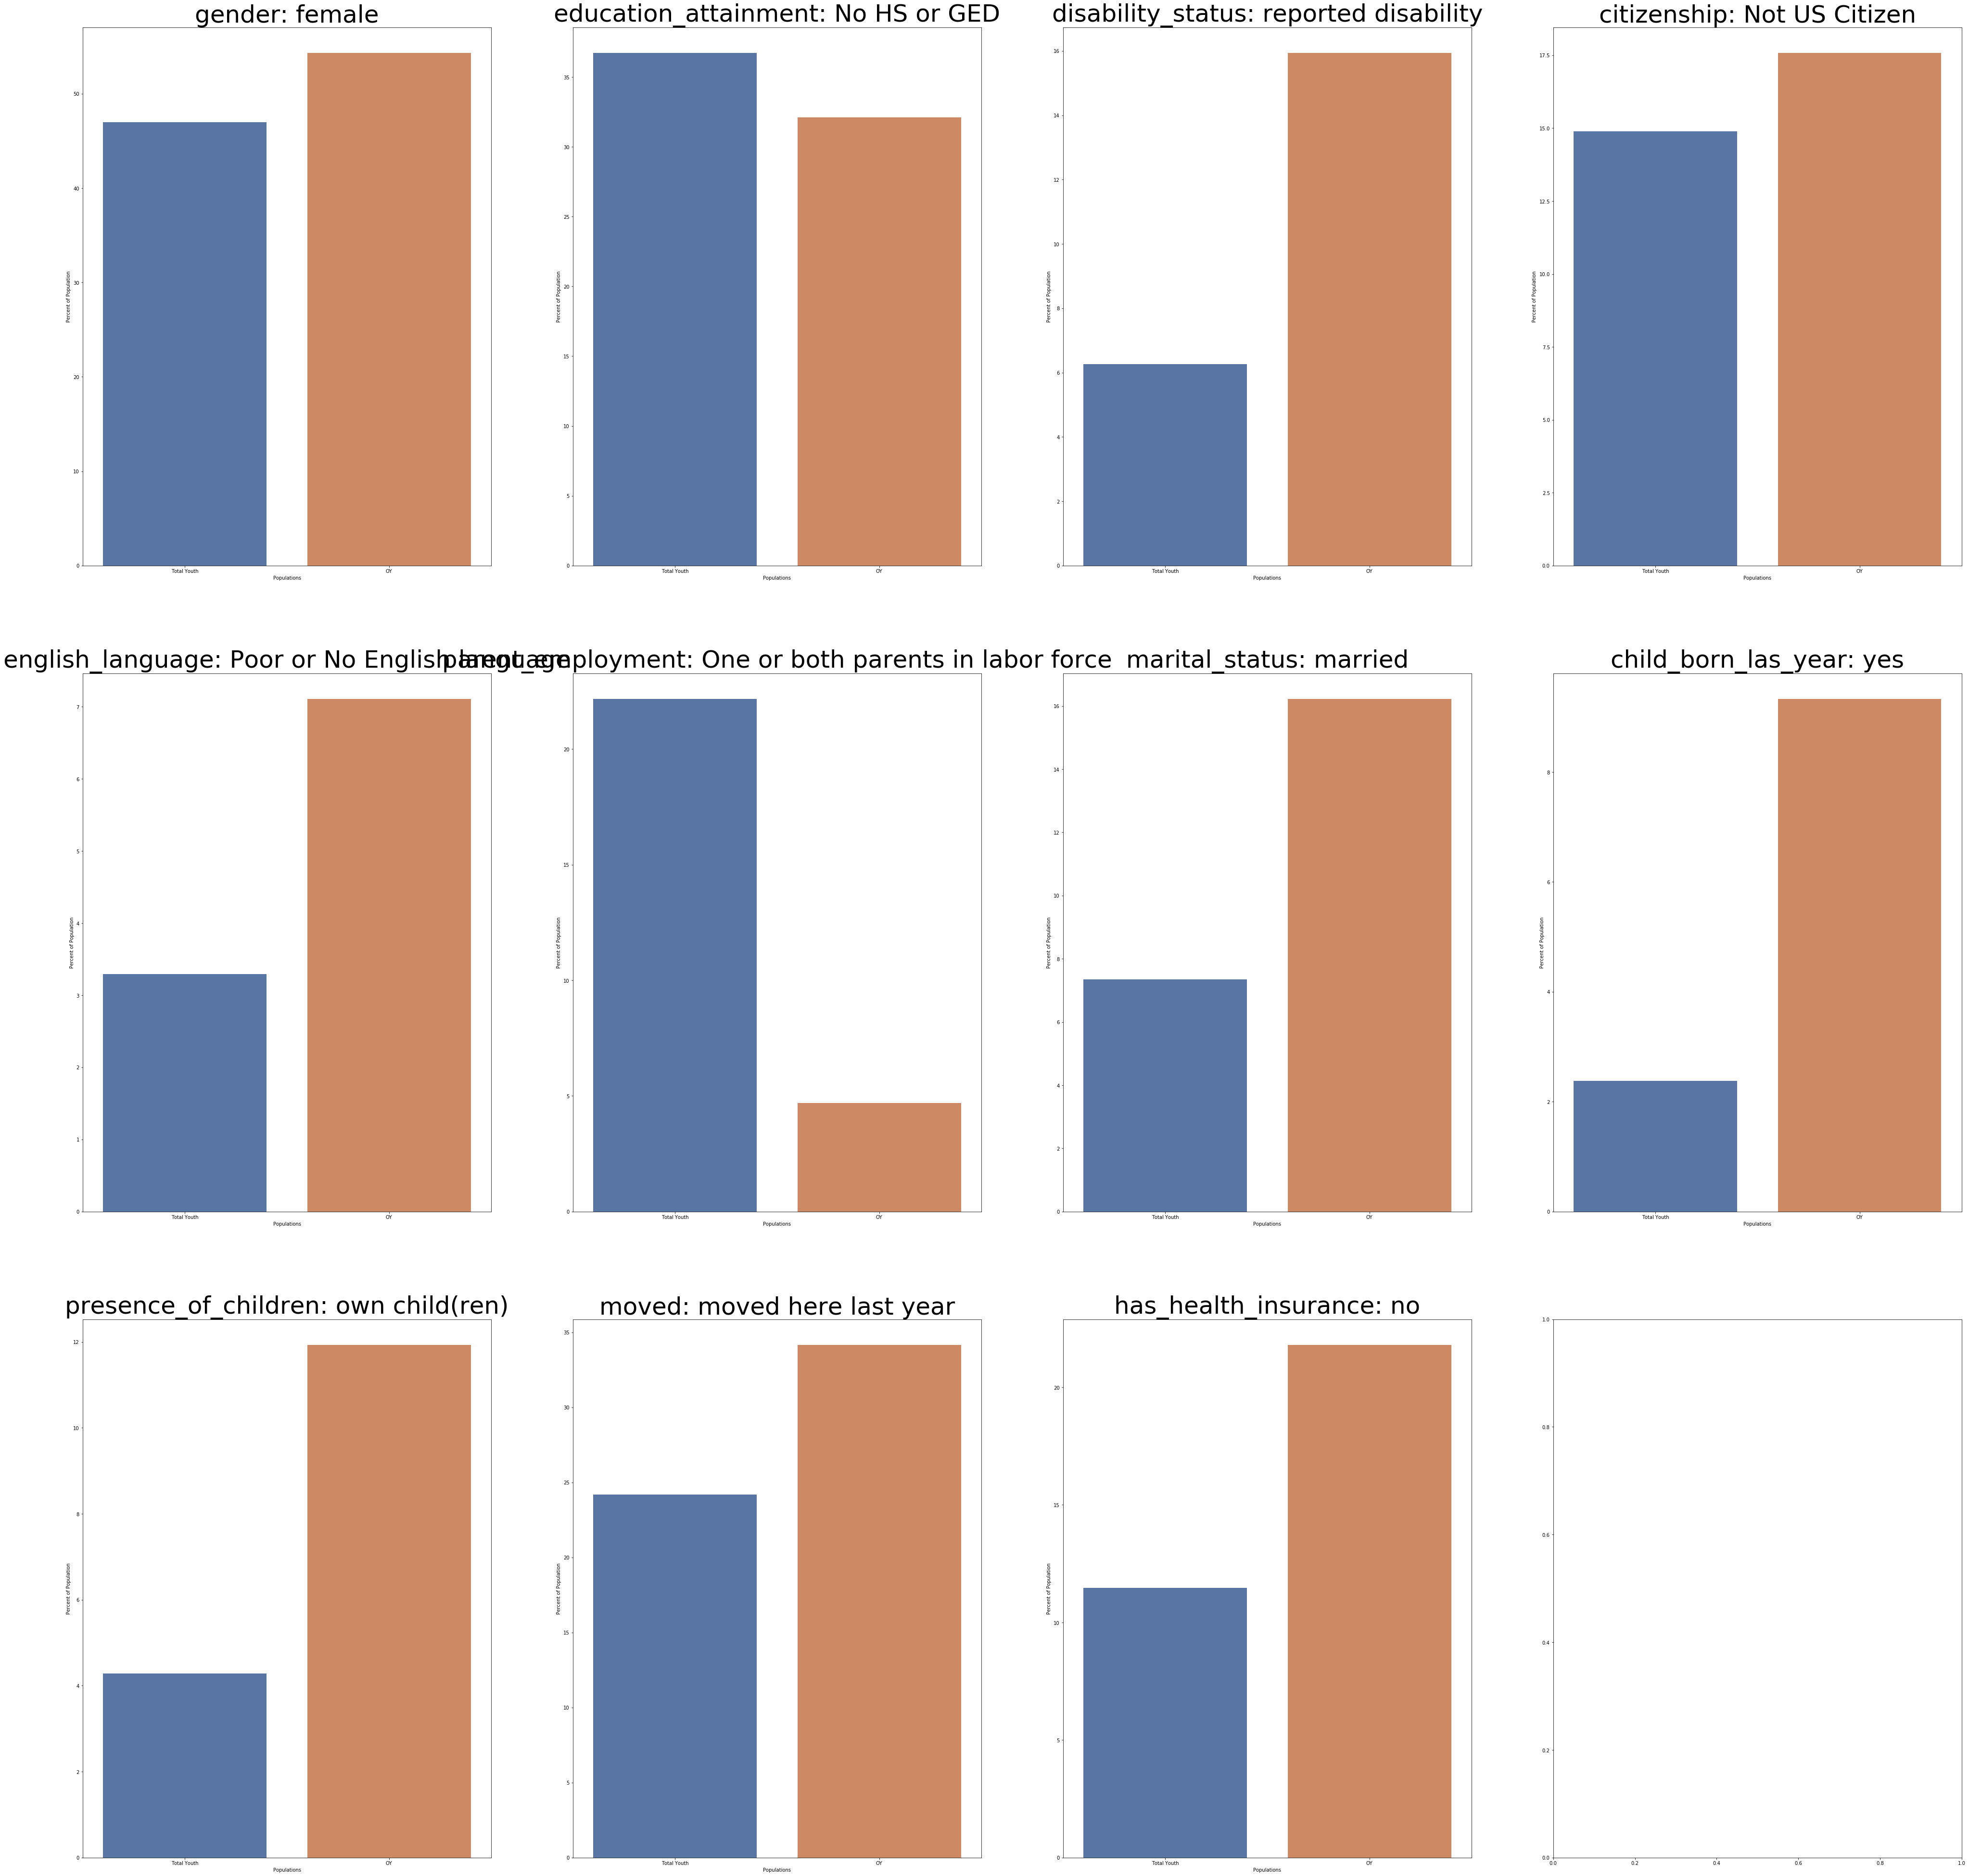

In [7]:
src.create_graph_matrix(variable_and_status_list, SKC_youth_2018, OY_df_2018, col_names=['Total Youth', 'OY'])

## Key findings:

#### OY are slightly more likely to not be US Citizens

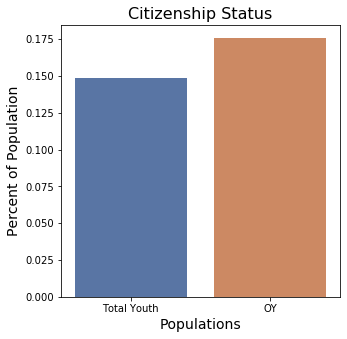

In [8]:
src.create_graph(('citizenship', 'Not US Citizen'), 
                 SKC_youth_2018, 
                 OY_df_2018, 
                 col_names=['Total Youth', 'OY'], 
                 title='Citizenship Status')

#### OY are more likely to have a reported disability


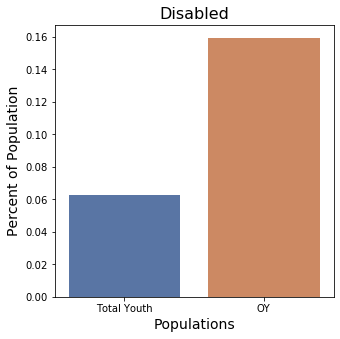

In [9]:
src.create_graph(('disability_status', 'reported disability'), 
                 SKC_youth_2018, 
                 OY_df_2018, 
                 col_names=['Total Youth', 'OY'], 
                 title='Disabled')

#### OY more likely to be in homes where neither parent is employed

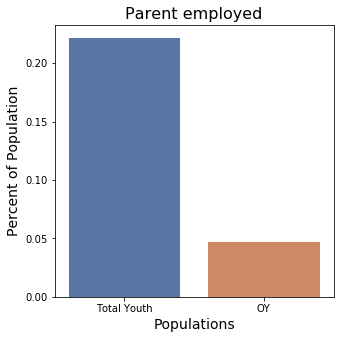

In [10]:
src.create_graph(('parent_employment', 'One or both parents in labor force'), 
                 SKC_youth_2018, 
                 OY_df_2018, 
                 col_names=['Total Youth', 'OY'], 
                 title='Parent employed')

#### The OY population has a much greater likelihood giving birth in the last year and more likely to be married than King county overall 


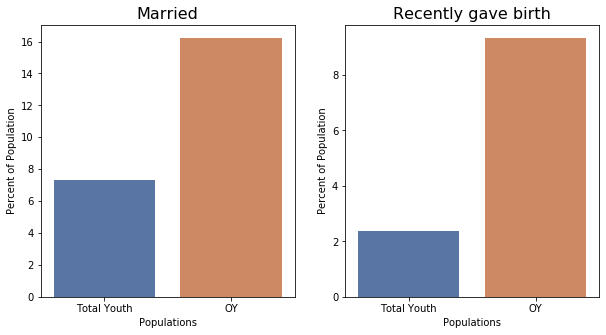

In [11]:
variable_and_status_list=[('marital_status', 'married'), ('child_born_las_year', 'yes')]
title_list=['Married', 'Recently gave birth']
col_names=['Total Youth', 'OY']
ctr = 0

fig, ax = plt.subplots(1,2, figsize=(10,5))

for col in range(2):
    if ctr >= len(variable_and_status_list):
        break
    else:
        variable_and_status=variable_and_status_list[ctr]
        prct_tuple = src.compare(variable_and_status, SKC_youth_2018, OY_df_2018)
        height_values = np.array(prct_tuple)*100

        ax[col].set_title(title_list[ctr], fontsize=16)
    #     ax1.set_ylim(0,100) #Uncomment to scale axis to 100
        ax[col].set_ylabel('Percent of Population')
        ax[col].set_xlabel('Populations')
        sns.barplot(x=col_names, y=height_values, palette="deep", ax=ax[col])
    #    fig.savefig(variable_and_status[0]+'.png')
        ctr+=1

#### OY are far more likely to have poor english language skills

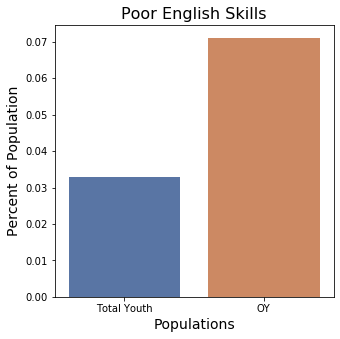

In [12]:
src.create_graph(('english_language', 'Poor or No English language'), 
                 SKC_youth_2018, 
                 OY_df_2018, 
                 col_names=['Total Youth', 'OY'], 
                 title='Poor English Skills')

### RECOMMENDATIONS:

We see opportunity in coordinating existing programs and working with employers in King County to specifically address the needs of OY who have at least a HS diploma/GED.

Some possible programs may include:
- A new business/OY employment partnership - incentive programs can be created to assist new small businesses with start-up costs in exchange for employment of OY, this type of program could also include a subsidy for a portion of the OY salary/benefits or a tax incentive for each OY that is hired.  
- Career coaching programs for OY who have recently left employment to assist them in finding new employment, and working with OY who are in their first entry-level job to assist them in mapping out steps to take to achieve their career goals.
- Employer partnerships - South King County has available jobs, the barrier to many of these jobs is skills.  Many of the skills needed are technical and could be learned through an apprenticeship program that would couple on-the-job (paid) training with subsidized coursework offered through community college

### ADDITIONAL AREAS OF STUDY:

We were unable to find any reliable data indicating the number of OY that are or have been homeless in the last year, as we see from earlier SRP reports, homelessness is a driver of HS dropout rates.  This would be an area that could offer additional avenues for intervention that could help reduce the OY population by keeping them in school longer.

There is also evidence that indicates that LGBTQ youth are over-represented in the homeless population.  We have not been able to find data that could directly tie this to the SKC population, but feel that this would be another fruitful  avenue for further study.

Past judicial system involvement - here again we were unable to find any data that could directly tie this to the OY population in South King County, however anecdotal evidence indicates that this is a barrier to employment and may also prevent youth from obtaining post HS education.  
